Heart Data Class Distribution:
target
1    165
0    138
Name: count, dtype: int64

Statlog Data Class Distribution:
target
0    150
1    120
Name: count, dtype: int64


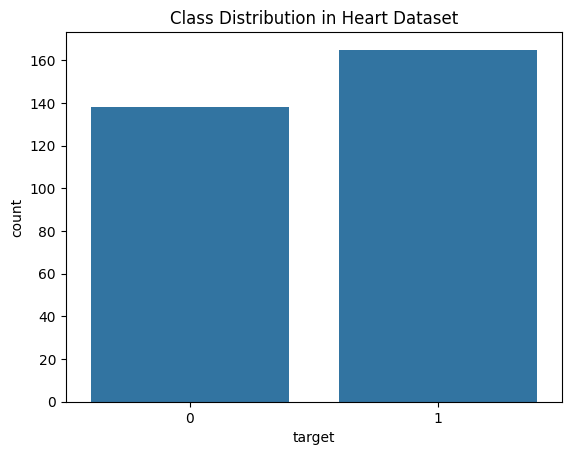

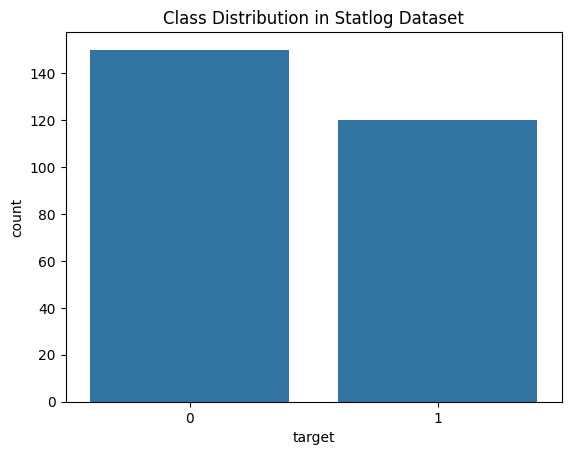

Heart Dataset Model Performance (Balanced and Scaled):
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       0.89      0.89      0.89        28

    accuracy                           0.89        56
   macro avg       0.89      0.89      0.89        56
weighted avg       0.89      0.89      0.89        56

Confusion Matrix:
 [[25  3]
 [ 3 25]]

Statlog Dataset Model Performance (Balanced and Scaled):
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.88      0.71      0.79        31

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60

Confusion Matrix:
 [[26  3]
 [ 9 22]]

Cross-Validation for Heart Dataset (Balanced and Scaled):
Fold Score: 0.8393
Fold Score: 0.8909
Fold Score: 0.8364
Fold Score: 0.8727
Fold Score: 0.7818
Ave

<Figure size 1200x1000 with 0 Axes>

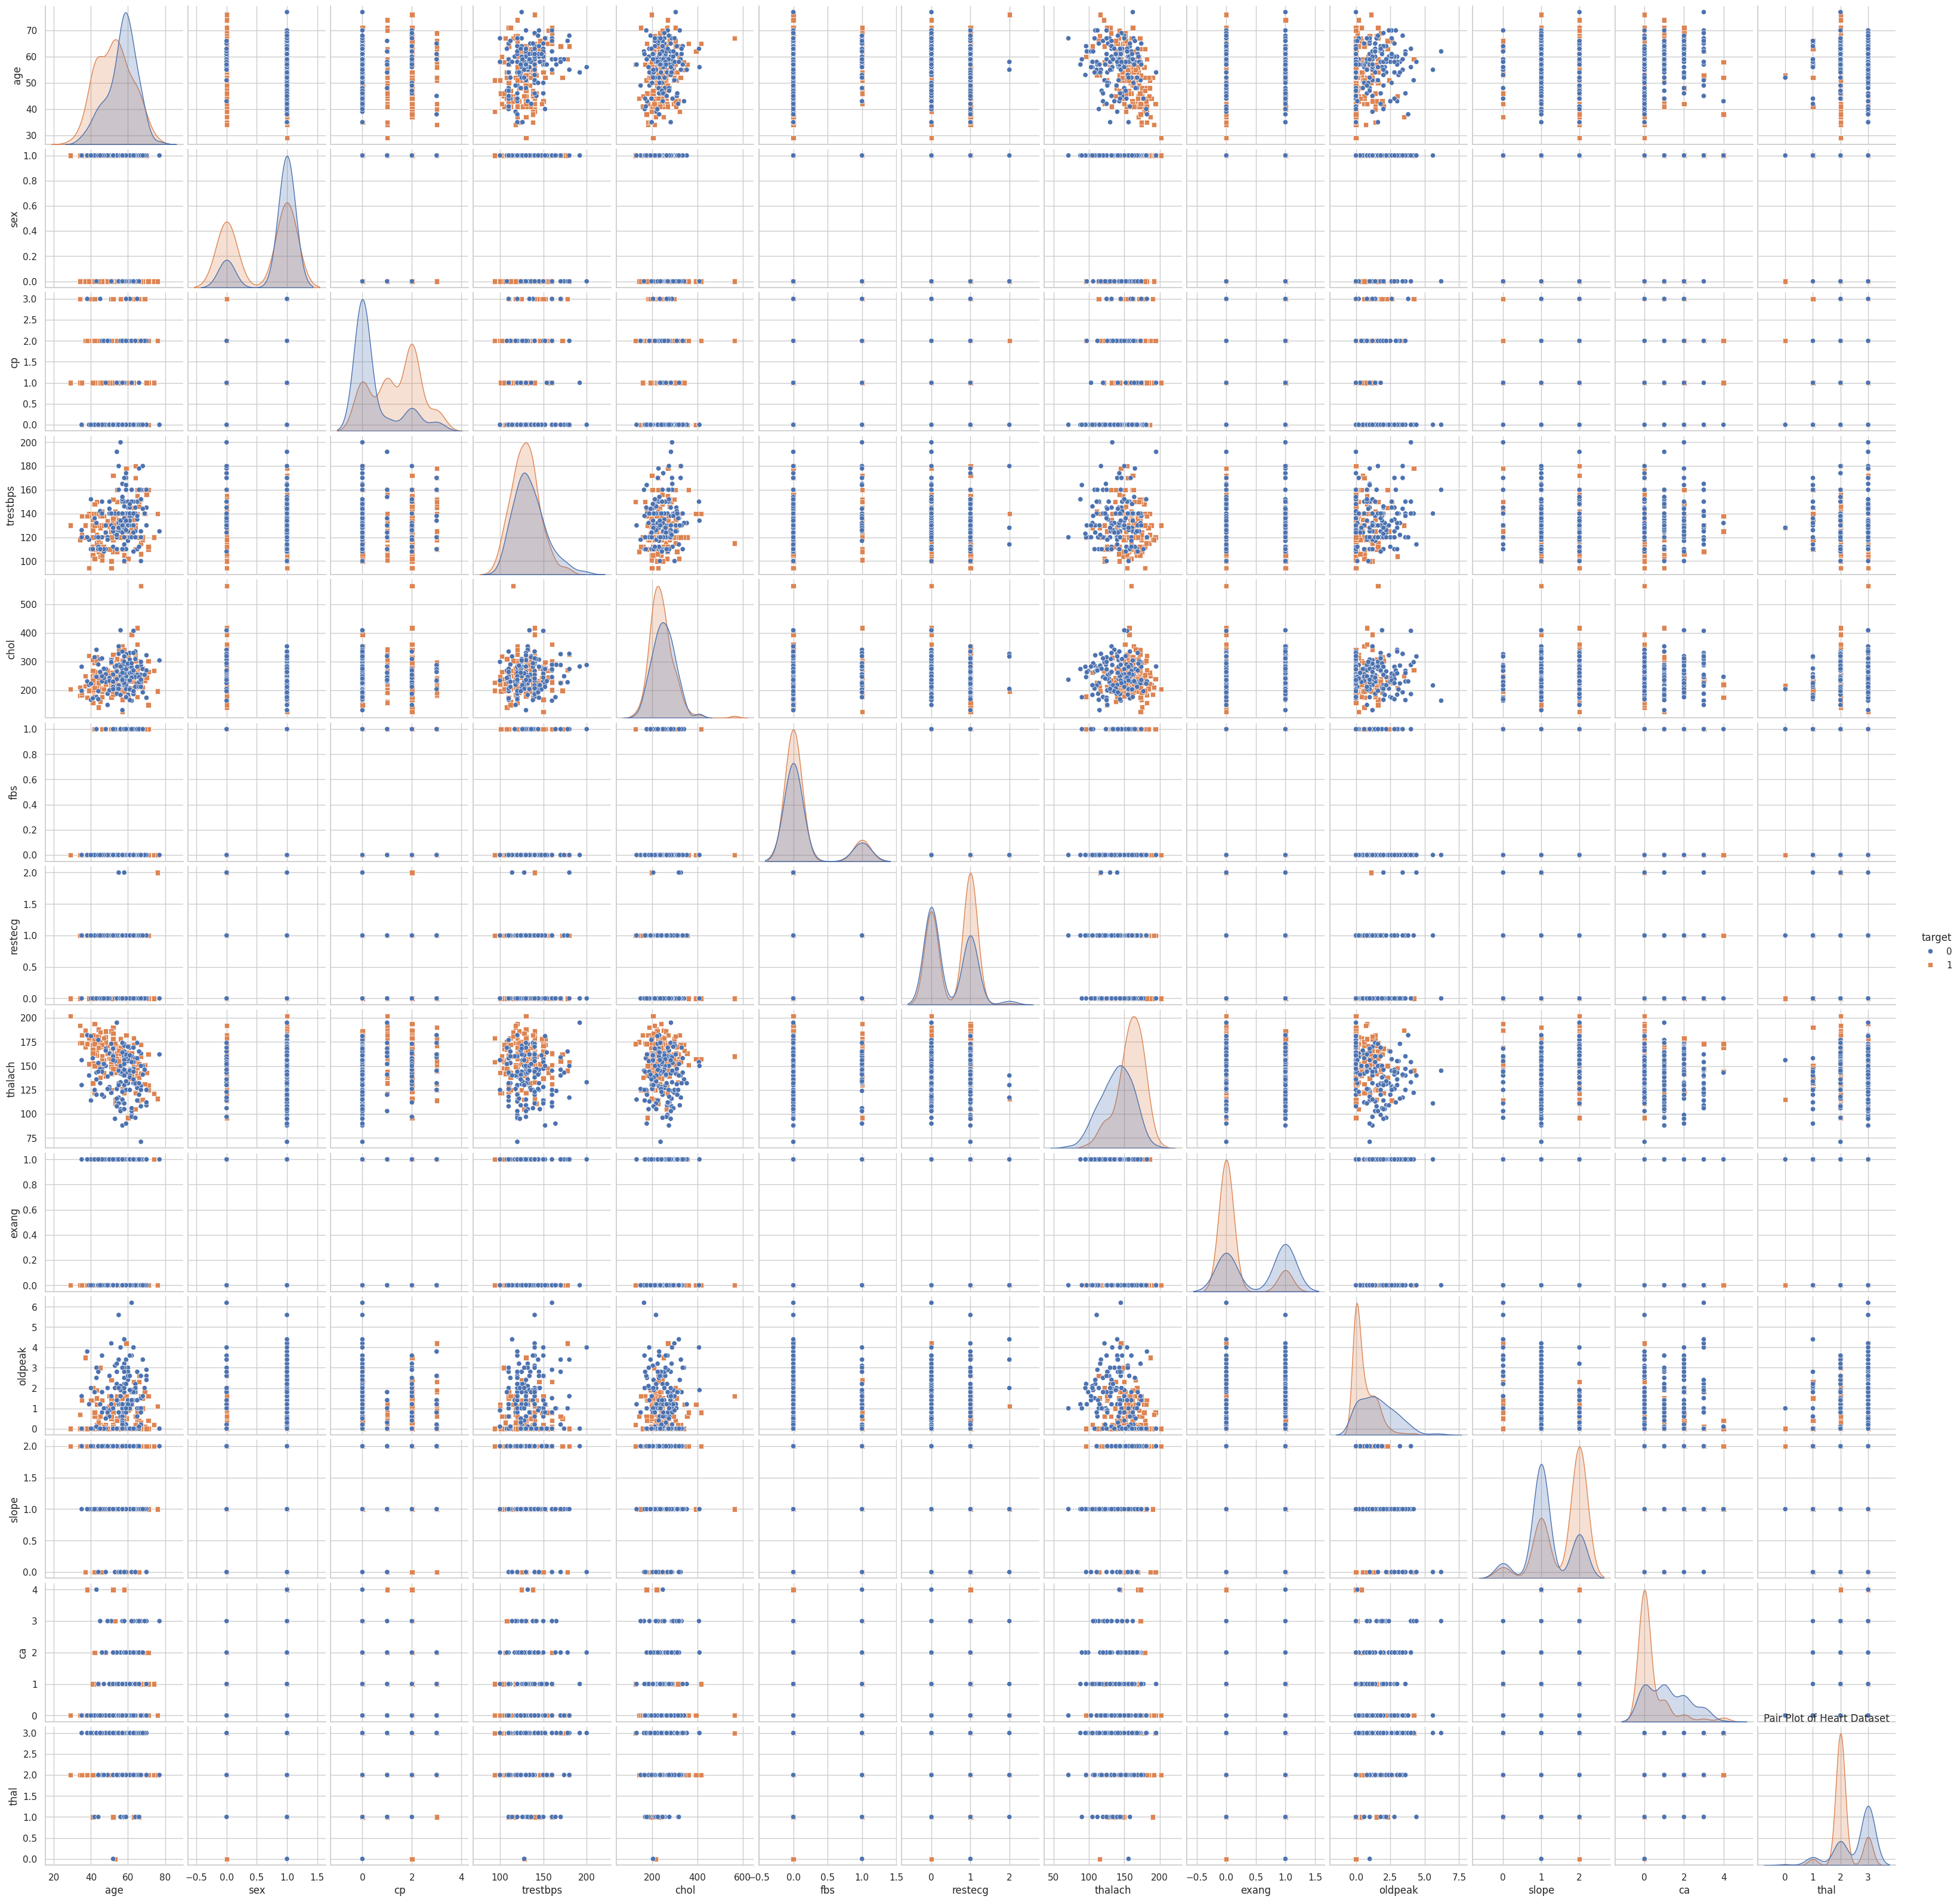

<Figure size 1200x1000 with 0 Axes>

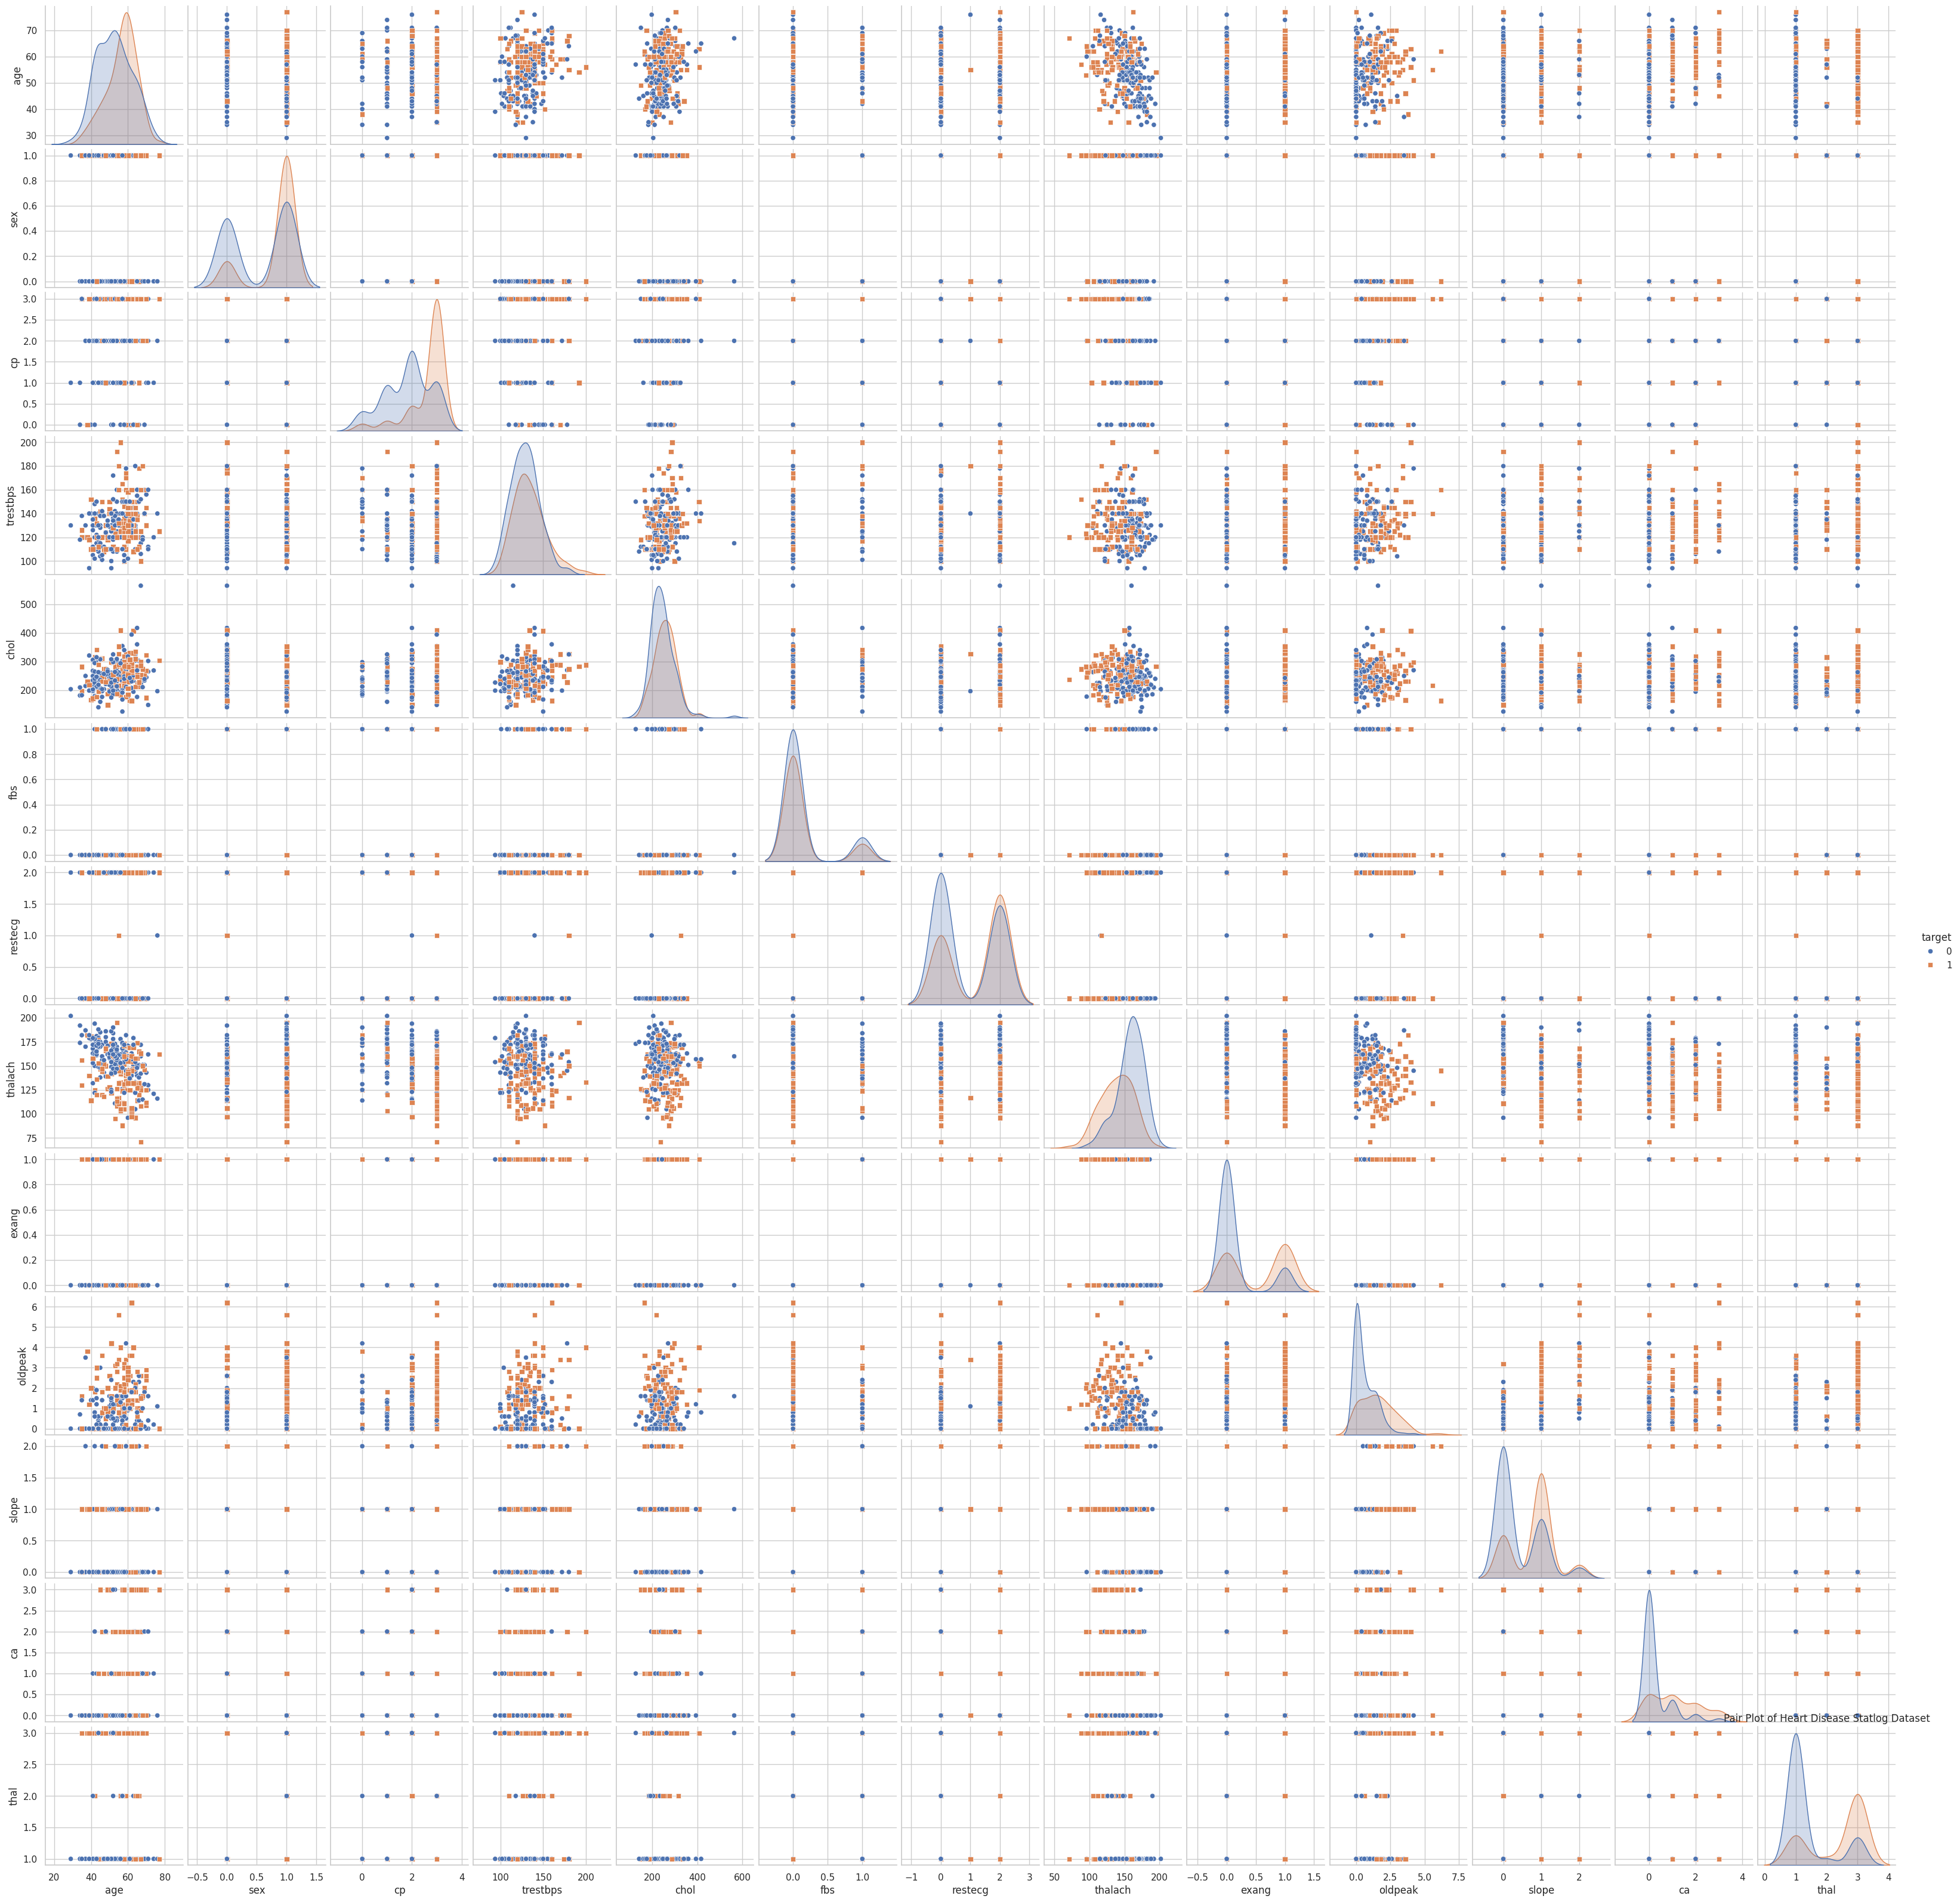

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
heart_data = pd.read_csv('/content/heart.csv')
statlog_data = pd.read_csv('/content/Heart_disease_statlog.csv')

# Check class distribution for heart_data
print("Heart Data Class Distribution:")
print(heart_data['target'].value_counts())

# Check class distribution for statlog_data
print("\nStatlog Data Class Distribution:")
print(statlog_data['target'].value_counts())

# Plotting class distributions
sns.countplot(x='target', data=heart_data)
plt.title('Class Distribution in Heart Dataset')
plt.show()
sns.countplot(x='target', data=statlog_data)
plt.title('Class Distribution in Statlog Dataset')
plt.show()

# Function to balance classes using upsampling or downsampling
def balance_classes(data, target_col):
    # Separate majority and minority classes
    majority = data[data[target_col] == 0]
    minority = data[data[target_col] == 1]
    # Upsample minority class
    minority_upsampled = resample(minority,
                                replace=True,
                                n_samples=len(majority),
                                random_state=123)
    # Combine majority class with upsampled minority class
    upsampled = pd.concat([majority, minority_upsampled])
    return upsampled

# Balance both datasets if necessary
balanced_heart_data = balance_classes(heart_data, 'target')
balanced_statlog_data = balance_classes(statlog_data, 'target')

# Define features and target variable for balanced heart_data and statlog_data
X_heart_balanced = balanced_heart_data.drop('target', axis=1)
y_heart_balanced = balanced_heart_data['target']
X_statlog_balanced = balanced_statlog_data.drop('target', axis=1)
y_statlog_balanced = balanced_statlog_data['target']

# Split the balanced datasets into training and testing sets (80-20 split)
X_train_heart_bal, X_test_heart_bal, y_train_heart_bal, y_test_heart_bal = train_test_split(X_heart_balanced, y_heart_balanced,
test_size=0.2, random_state=42)
X_train_statlog_bal, X_test_statlog_bal, y_train_statlog_bal, y_test_statlog_bal = train_test_split(X_statlog_balanced,
y_statlog_balanced, test_size=0.2, random_state=42)

# Scale the balanced data
scaler = StandardScaler()
X_train_heart_bal_scaled = scaler.fit_transform(X_train_heart_bal)
X_test_heart_bal_scaled = scaler.transform(X_test_heart_bal)
X_train_statlog_bal_scaled = scaler.fit_transform(X_train_statlog_bal)
X_test_statlog_bal_scaled = scaler.transform(X_test_statlog_bal)

# Function to train and evaluate model performance
def train_and_evaluate(X_train, X_test, y_train, y_test):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    # Predictions on test set
    y_pred = model.predict(X_test)
    # Evaluation metrics
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Train and evaluate models for both datasets using balanced and scaled data
print("Heart Dataset Model Performance (Balanced and Scaled):")
train_and_evaluate(X_train_heart_bal_scaled, X_test_heart_bal_scaled, y_train_heart_bal, y_test_heart_bal)
print("\nStatlog Dataset Model Performance (Balanced and Scaled):")
train_and_evaluate(X_train_statlog_bal_scaled, X_test_statlog_bal_scaled, y_train_statlog_bal, y_test_statlog_bal)

# Using Stratified K-Folds Cross-Validation for evaluation
def cross_validate_model(X, y):
    skf = StratifiedKFold(n_splits=5)
    model = LogisticRegression(max_iter=1000)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train_cv, X_test_cv = X[train_index], X[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]

        # Scale within cross-validation folds to prevent data leakage
        scaler_cv = StandardScaler()
        X_train_cv_scaled = scaler_cv.fit_transform(X_train_cv)
        X_test_cv_scaled = scaler_cv.transform(X_test_cv)

        model.fit(X_train_cv_scaled, y_train_cv)
        score = model.score(X_test_cv_scaled, y_test_cv)
        scores.append(score)
        print(f"Fold Score: {score:.4f}")
    print(f"Average CV Score: {np.mean(scores):.4f}")

print("\nCross-Validation for Heart Dataset (Balanced and Scaled):")
cross_validate_model(X_heart_balanced.to_numpy(), y_heart_balanced.to_numpy())
print("\nCross-Validation for Statlog Dataset (Balanced and Scaled):")
cross_validate_model(X_statlog_balanced.to_numpy(), y_statlog_balanced.to_numpy())

# Analyze demographic distributions (e.g., age and sex) across classes.
print("\nDemographic Analysis - Heart Dataset:")
print(balanced_heart_data.groupby(['sex', 'target']).size())
print("\nDemographic Analysis - Statlog Dataset:")
print(balanced_statlog_data.groupby(['sex', 'target']).size())

# --- Original (unbalanced, unscaled) data processing for comparison ---
# For heart_data
X_heart = heart_data.drop('target', axis=1)
y_heart = heart_data['target']
# For statlog_data
X_statlog = statlog_data.drop('target', axis=1)
y_statlog = statlog_data['target']

# Split the heart dataset into training and testing sets (80-20 split)
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart,
test_size=0.2, random_state=42)
# Split the statlog dataset into training and testing sets (80-20 split)
X_train_statlog, X_test_statlog, y_train_statlog, y_test_statlog = train_test_split(X_statlog,
y_statlog, test_size=0.2, random_state=42)

# Scale the original data
scaler_orig = StandardScaler()
X_train_heart_scaled = scaler_orig.fit_transform(X_train_heart)
X_test_heart_scaled = scaler_orig.transform(X_test_heart)
X_train_statlog_scaled = scaler_orig.fit_transform(X_train_statlog)
X_test_statlog_scaled = scaler_orig.transform(X_test_statlog)

# Train a Logistic Regression model on heart_data (scaled)
model_heart = LogisticRegression(max_iter=1000)
model_heart.fit(X_train_heart_scaled, y_train_heart)
y_pred_heart = model_heart.predict(X_test_heart_scaled)

# Train a Logistic Regression model on statlog_data (scaled)
model_statlog = LogisticRegression(max_iter=1000)
model_statlog.fit(X_train_statlog_scaled, y_train_statlog)
y_pred_statlog = model_statlog.predict(X_test_statlog_scaled)

# Calculate accuracy for heart_data
accuracy_heart = accuracy_score(y_test_heart, y_pred_heart)
print(f'Accuracy for Heart Dataset (Original Data, Scaled): {accuracy_heart:.2f}')
# Calculate accuracy for statlog_data
accuracy_statlog = accuracy_score(y_test_statlog, y_pred_statlog)
print(f'Accuracy for Statlog Dataset (Original Data, Scaled): {accuracy_statlog:.2f}')

# Set the style of seaborn
sns.set(style="whitegrid")
# Create pair plot for heart_data
plt.figure(figsize=(12, 10))
sns.pairplot(heart_data, hue='target', diag_kind='kde', markers=["o", "s"])
plt.title('Pair Plot of Heart Dataset')
plt.show()
# Create pair plot for statlog_data
plt.figure(figsize=(12, 10))
sns.pairplot(statlog_data, hue='target', diag_kind='kde', markers=["o", "s"])
plt.title('Pair Plot of Heart Disease Statlog Dataset')
plt.show()